In [5]:
# Importing libraries 
import numpy as np 
import pandas as pd 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 

%matplotlib inline


# numpy - a powerful library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection
#         of mathematical functions to operate on these arrays. Numpy is widely used in scientific computing, data analysis, and machine learning applications.
#
# pandas - a powerful library for data manipulation and analysis. It provides data structures such as DataFrame and Series, which allow you to work with 
#          structured data efficiently. Pandas is widely used for data cleaning, exploration, and preprocessing tasks in data science and machine learning 
#          projects.
#
# seaborn - a data visualization library based on Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.
#           Seaborn is commonly used for visualizing relationships between variables, exploring distributions of data, and creating visually appealing plots.
#
# matplotlib - a plotting library for creating static, animated, and interactive visualizations in Python. It provides a wide variety of plots, including line
#              plots, scatter plots, bar plots, histograms, and more. Matplotlib is widely used for data visualization and is often used in conjunction with
#              other libraries such as NumPy and pandas.
#
# scikit-learn / sklearn - a machine learning library in Python. It provides a wide range of algorithms and tools for tasks such as classification, regression, clustering,
#           dimensionality reduction, and model selection. Sklearn is widely used in the field of data science and machine learning for building and evaluating
#           predictive models.
#
# scipy - a scientific computing library in Python. It provides a collection of mathematical algorithms and functions for tasks such as numerical integration,
#         optimization, interpolation, linear algebra, signal processing, and more. Scipy is built on top of NumPy and is widely used in scientific and
#         engineering applications for data analysis, simulation, and modeling.


Whenever we are solving a classification task it is necessary to check whether our target column is balanced or not. We will be using a bar plot, to check whether the dataset is balanced or not.

Balanced dataset means target column of class A and class B should be in 50:50 ratio or 60:40 ratio. When we have class A and B of 80:20 or 90:10 is considered as Imbalanced Dataset. If we have such dataset, the model will get biased and it will lead to Model Overfitting.

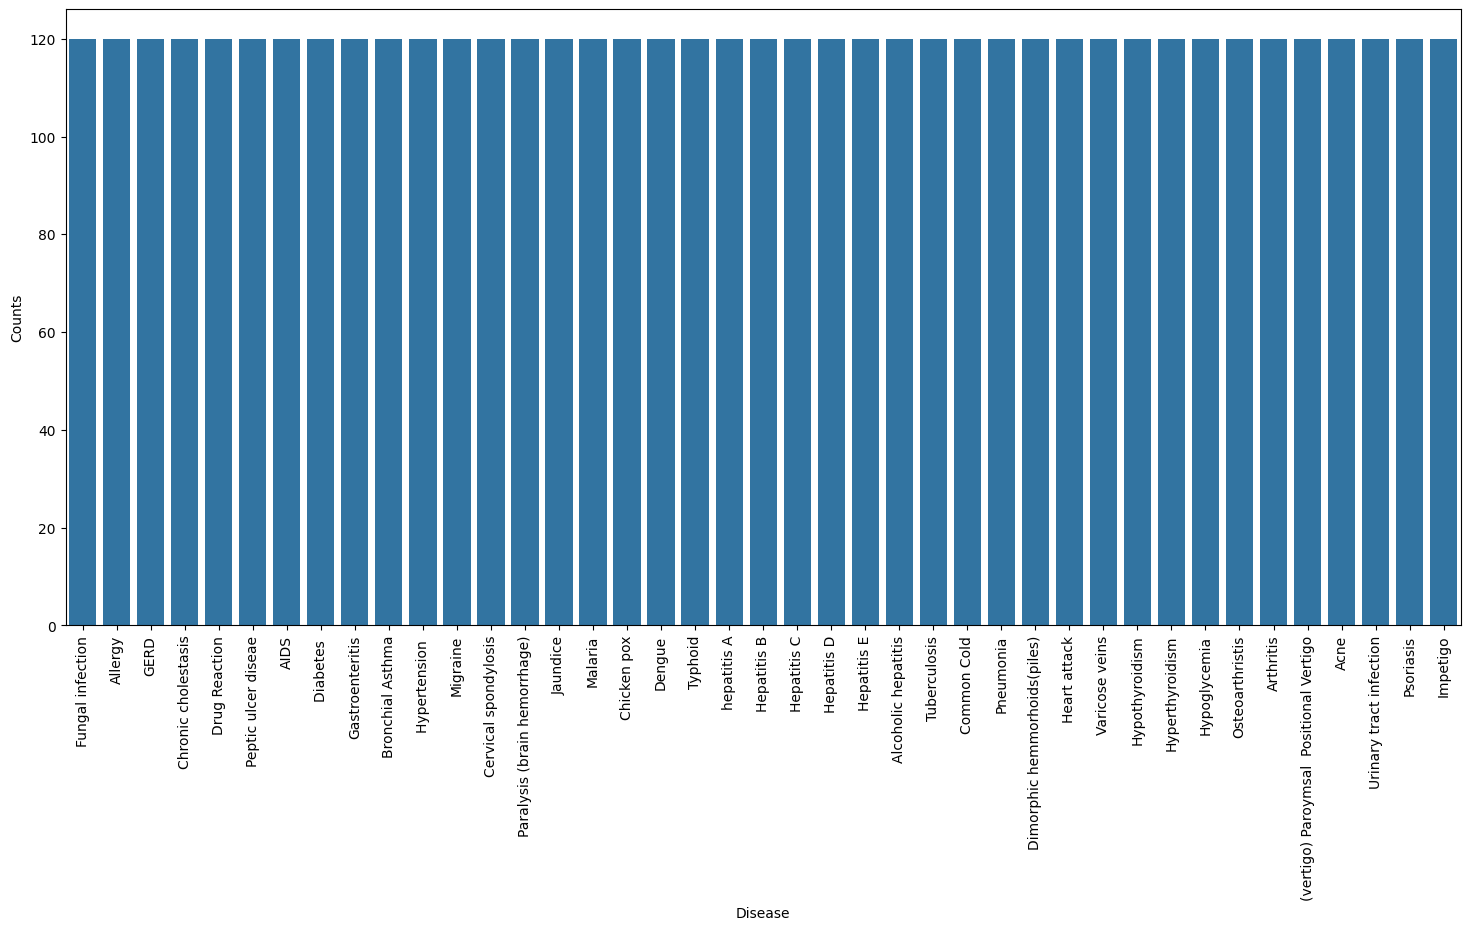

In [8]:
# Reading the train.csv by removing the 
# last column since it's an empty column 
DATA_PATH = "../data/Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1) 

# Checking whether the dataset is balanced or not 
disease_counts = data["prognosis"].value_counts() 
temp_df = pd.DataFrame({ 
	"Disease": disease_counts.index, 
	"Counts": disease_counts.values 
}) 

plt.figure(figsize = (18,8)) 
sns.barplot(x = "Disease", y = "Counts", data = temp_df) 
plt.xticks(rotation=90) 
plt.show()


In [10]:
data.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

From the above plot, we can observe that the dataset is a balanced dataset i.e. there are exactly 120 samples for each disease, and no further balancing is required. We can notice that our target column i.e. prognosis column is of object datatype, this format is not suitable to train a machine learning model. So, we will be using a label encoder to convert the prognosis column to the numerical datatype.

In [15]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])
data["prognosis"].head

<bound method NDFrame.head of 0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64>

We will be splitting the data into 80:20 format i.e. 80% of the dataset will be used for training the model and 20% of the data will be used to evaluate the performance of the models.

In [25]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=19)
print(f"Train: {x_train.shape}, {y_train.shape}") 
print(f"Test: {x_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


We will be using K-Fold cross-validation to evaluate the machine-learning models. We will be using Support Vector Classifier, Gaussian Naive Bayes Classifier, and Random Forest Classifier for cross-validation.

K-Fold Cross-Validation: K-Fold cross-validation is one of the cross-validation techniques in which the whole dataset is split into k number of subsets, also known as folds, then training of the model is performed on the k-1 subsets and the remaining one subset is used to evaluate the model performance.

Support Vector Classifier: Support Vector Classifier is a discriminative classifier i.e. when given a labeled training data, the algorithm tries to find an optimal hyperplane that accurately separates the samples into different categories in hyperspace.

Gaussian Naive Bayes Classifier: It is a probabilistic machine learning algorithm that internally uses Bayes Theorem to classify the data points.

Random Forest Classifier: Random Forest is an ensemble learning-based supervised machine learning classification algorithm that internally uses multiple decision trees to make the classification. In a random forest classifier, all the internal decision trees are weak learners, and the outputs of these weak decision trees are combined i.e. mode of all the predictions is as the final prediction.


In [27]:
# Defining scoring metric for k-fold cross validation 
def cv_scoring(estimator, X, y): 
	return accuracy_score(y, estimator.predict(X)) 

# Initializing Models 
models = { 
	"SVC":SVC(), 
	"Gaussian NB":GaussianNB(), 
	"Random Forest":RandomForestClassifier(random_state=18) 
} 

# Producing cross validation score for the models 
for model_name in models: 
	model = models[model_name] 
	scores = cross_val_score(model, x, y, cv = 10, 
							n_jobs = -1, 
							scoring = cv_scoring) 
	print("=="*30) 
	print(model_name) 
	print(f"Scores: {scores}") 
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
